# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 19524 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past)


  0% (    1 of 19524) |           | Elapsed Time: 0:00:29 ETA:  6 days, 17:25:31

  0% (   69 of 19524) |                    | Elapsed Time: 0:00:30 ETA:  0:04:17

  0% (  141 of 19524) |                    | Elapsed Time: 0:00:31 ETA:  0:04:09

  1% (  212 of 19524) |                    | Elapsed Time: 0:00:32 ETA:  0:04:07

  1% (  245 of 19524) |                    | Elapsed Time: 0:00:33 ETA:  0:04:09

  1% (  317 of 19524) |                    | Elapsed Time: 0:00:34 ETA:  0:04:05

  1% (  377 of 19524) |                    | Elapsed Time: 0:00:35 ETA:  0:04:12

  2% (  442 of 19524) |                    | Elapsed Time: 0:00:36 ETA:  0:04:13

  2% (  489 of 19524) |                    | Elapsed Time: 0:00:36 ETA:  0:04:12

  2% (  568 of 19524) |                    | Elapsed Time: 0:00:38 ETA:  0:04:05

  3% (  640 of 19524) |                    | Elapsed Time: 0:00:39 ETA:  0:04:02

  3% (  710 of 19524) |                    | Elapsed Time: 0:00:40 ETA:  0:04:02

  3% (  733 of 19524) |                    | Elapsed Time: 0:00:40 ETA:  0:04:01

  4% (  801 of 19524) |                    | Elapsed Time: 0:00:41 ETA:  0:04:00

  4% (  871 of 19524) |                    | Elapsed Time: 0:00:42 ETA:  0:04:00

  4% (  942 of 19524) |                    | Elapsed Time: 0:00:43 ETA:  0:03:54

  5% (  977 of 19524) |#                   | Elapsed Time: 0:00:43 ETA:  0:03:50

  5% ( 1051 of 19524) |#                   | Elapsed Time: 0:00:44 ETA:  0:03:47

  5% ( 1123 of 19524) |#                   | Elapsed Time: 0:00:45 ETA:  0:03:50

  6% ( 1194 of 19524) |#                   | Elapsed Time: 0:00:46 ETA:  0:03:49

  6% ( 1221 of 19524) |#                   | Elapsed Time: 0:00:47 ETA:  0:03:48

  6% ( 1293 of 19524) |#                   | Elapsed Time: 0:00:48 ETA:  0:03:48

  6% ( 1364 of 19524) |#                   | Elapsed Time: 0:00:49 ETA:  0:03:45

  7% ( 1432 of 19524) |#                   | Elapsed Time: 0:00:50 ETA:  0:03:45

  7% ( 1465 of 19524) |#                   | Elapsed Time: 0:00:50 ETA:  0:03:44

  7% ( 1470 of 19524) |#                   | Elapsed Time: 0:00:51 ETA:  0:04:24

  7% ( 1538 of 19524) |#                   | Elapsed Time: 0:00:52 ETA:  0:04:27

  8% ( 1605 of 19524) |#                   | Elapsed Time: 0:00:53 ETA:  0:04:29

  8% ( 1673 of 19524) |#                   | Elapsed Time: 0:00:54 ETA:  0:04:30

  8% ( 1709 of 19524) |#                   | Elapsed Time: 0:00:55 ETA:  0:04:29

  9% ( 1778 of 19524) |#                   | Elapsed Time: 0:00:56 ETA:  0:04:30

  9% ( 1846 of 19524) |#                   | Elapsed Time: 0:00:57 ETA:  0:04:31

  9% ( 1915 of 19524) |#                   | Elapsed Time: 0:00:58 ETA:  0:04:29

 10% ( 1953 of 19524) |##                  | Elapsed Time: 0:00:58 ETA:  0:04:29

 10% ( 2023 of 19524) |##                  | Elapsed Time: 0:00:59 ETA:  0:03:46

 10% ( 2093 of 19524) |##                  | Elapsed Time: 0:01:00 ETA:  0:03:45

 11% ( 2165 of 19524) |##                  | Elapsed Time: 0:01:01 ETA:  0:03:41

 11% ( 2197 of 19524) |##                  | Elapsed Time: 0:01:02 ETA:  0:03:40

 11% ( 2268 of 19524) |##                  | Elapsed Time: 0:01:03 ETA:  0:03:38

 11% ( 2333 of 19524) |##                  | Elapsed Time: 0:01:04 ETA:  0:03:39

 12% ( 2399 of 19524) |##                  | Elapsed Time: 0:01:05 ETA:  0:03:39

 12% ( 2441 of 19524) |##                  | Elapsed Time: 0:01:06 ETA:  0:03:39

 12% ( 2506 of 19524) |##                  | Elapsed Time: 0:01:07 ETA:  0:03:40

 13% ( 2571 of 19524) |##                  | Elapsed Time: 0:01:08 ETA:  0:03:41

 13% ( 2639 of 19524) |##                  | Elapsed Time: 0:01:09 ETA:  0:03:41

 13% ( 2685 of 19524) |##                  | Elapsed Time: 0:01:09 ETA:  0:03:42

 14% ( 2755 of 19524) |##                  | Elapsed Time: 0:01:10 ETA:  0:03:40

 14% ( 2825 of 19524) |##                  | Elapsed Time: 0:01:11 ETA:  0:03:40

 14% ( 2897 of 19524) |##                  | Elapsed Time: 0:01:12 ETA:  0:03:36

 15% ( 2929 of 19524) |###                 | Elapsed Time: 0:01:13 ETA:  0:03:34

 15% ( 3000 of 19524) |###                 | Elapsed Time: 0:01:14 ETA:  0:03:31

 15% ( 3068 of 19524) |###                 | Elapsed Time: 0:01:15 ETA:  0:03:28

 16% ( 3135 of 19524) |###                 | Elapsed Time: 0:01:16 ETA:  0:03:26

 16% ( 3173 of 19524) |###                 | Elapsed Time: 0:01:16 ETA:  0:03:24

 16% ( 3246 of 19524) |###                 | Elapsed Time: 0:01:17 ETA:  0:03:22

 17% ( 3321 of 19524) |###                 | Elapsed Time: 0:01:18 ETA:  0:03:19

 17% ( 3395 of 19524) |###                 | Elapsed Time: 0:01:19 ETA:  0:03:15

 17% ( 3417 of 19524) |###                 | Elapsed Time: 0:01:20 ETA:  0:03:16

 17% ( 3492 of 19524) |###                 | Elapsed Time: 0:01:21 ETA:  0:03:13

 18% ( 3566 of 19524) |###                 | Elapsed Time: 0:01:22 ETA:  0:03:10

 18% ( 3641 of 19524) |###                 | Elapsed Time: 0:01:23 ETA:  0:03:06

 18% ( 3661 of 19524) |###                 | Elapsed Time: 0:01:23 ETA:  0:03:02

 19% ( 3737 of 19524) |###                 | Elapsed Time: 0:01:24 ETA:  0:02:59

 19% ( 3811 of 19524) |###                 | Elapsed Time: 0:01:25 ETA:  0:02:58

 19% ( 3886 of 19524) |###                 | Elapsed Time: 0:01:26 ETA:  0:02:57

 20% ( 3905 of 19524) |####                | Elapsed Time: 0:01:26 ETA:  0:02:57

 20% ( 3979 of 19524) |####                | Elapsed Time: 0:01:27 ETA:  0:02:55

 20% ( 4055 of 19524) |####                | Elapsed Time: 0:01:28 ETA:  0:02:53

 21% ( 4131 of 19524) |####                | Elapsed Time: 0:01:29 ETA:  0:02:51

 21% ( 4149 of 19524) |####                | Elapsed Time: 0:01:29 ETA:  0:02:51

 21% ( 4223 of 19524) |####                | Elapsed Time: 0:01:30 ETA:  0:02:51

 21% ( 4294 of 19524) |####                | Elapsed Time: 0:01:31 ETA:  0:02:52

 22% ( 4370 of 19524) |####                | Elapsed Time: 0:01:32 ETA:  0:02:50

 22% ( 4393 of 19524) |####                | Elapsed Time: 0:01:33 ETA:  0:02:51

 22% ( 4465 of 19524) |####                | Elapsed Time: 0:01:34 ETA:  0:02:51

 23% ( 4537 of 19524) |####                | Elapsed Time: 0:01:35 ETA:  0:02:51

 23% ( 4612 of 19524) |####                | Elapsed Time: 0:01:36 ETA:  0:02:51

 23% ( 4637 of 19524) |####                | Elapsed Time: 0:01:36 ETA:  0:02:51

 24% ( 4711 of 19524) |####                | Elapsed Time: 0:01:37 ETA:  0:02:50

 24% ( 4719 of 19524) |####                | Elapsed Time: 0:01:39 ETA:  0:03:39

 24% ( 4783 of 19524) |####                | Elapsed Time: 0:01:40 ETA:  0:03:43

 24% ( 4850 of 19524) |####                | Elapsed Time: 0:01:41 ETA:  0:03:48

 25% ( 4882 of 19524) |#####               | Elapsed Time: 0:01:41 ETA:  0:03:48

 25% ( 4951 of 19524) |#####               | Elapsed Time: 0:01:42 ETA:  0:03:49

 25% ( 5020 of 19524) |#####               | Elapsed Time: 0:01:43 ETA:  0:03:50

 26% ( 5090 of 19524) |#####               | Elapsed Time: 0:01:44 ETA:  0:03:53

 26% ( 5126 of 19524) |#####               | Elapsed Time: 0:01:45 ETA:  0:03:51

 26% ( 5195 of 19524) |#####               | Elapsed Time: 0:01:46 ETA:  0:03:54

 26% ( 5258 of 19524) |#####               | Elapsed Time: 0:01:47 ETA:  0:03:04

 27% ( 5327 of 19524) |#####               | Elapsed Time: 0:01:48 ETA:  0:03:00

 27% ( 5370 of 19524) |#####               | Elapsed Time: 0:01:48 ETA:  0:02:59

 27% ( 5439 of 19524) |#####               | Elapsed Time: 0:01:49 ETA:  0:02:57

 28% ( 5507 of 19524) |#####               | Elapsed Time: 0:01:50 ETA:  0:02:56

 28% ( 5575 of 19524) |#####               | Elapsed Time: 0:01:51 ETA:  0:02:55

 28% ( 5614 of 19524) |#####               | Elapsed Time: 0:01:52 ETA:  0:02:56

 29% ( 5682 of 19524) |#####               | Elapsed Time: 0:01:53 ETA:  0:02:56

 29% ( 5750 of 19524) |#####               | Elapsed Time: 0:01:54 ETA:  0:02:55

 29% ( 5818 of 19524) |#####               | Elapsed Time: 0:01:55 ETA:  0:02:52

 30% ( 5858 of 19524) |######              | Elapsed Time: 0:01:55 ETA:  0:02:52

 30% ( 5921 of 19524) |######              | Elapsed Time: 0:01:56 ETA:  0:02:53

 30% ( 5992 of 19524) |######              | Elapsed Time: 0:01:57 ETA:  0:02:51

 31% ( 6066 of 19524) |######              | Elapsed Time: 0:01:58 ETA:  0:02:48

 31% ( 6102 of 19524) |######              | Elapsed Time: 0:01:59 ETA:  0:02:46

 31% ( 6175 of 19524) |######              | Elapsed Time: 0:02:00 ETA:  0:02:43

 32% ( 6251 of 19524) |######              | Elapsed Time: 0:02:01 ETA:  0:02:38

 32% ( 6324 of 19524) |######              | Elapsed Time: 0:02:02 ETA:  0:02:35

 32% ( 6346 of 19524) |######              | Elapsed Time: 0:02:02 ETA:  0:02:33

 32% ( 6416 of 19524) |######              | Elapsed Time: 0:02:03 ETA:  0:02:32

 33% ( 6490 of 19524) |######              | Elapsed Time: 0:02:04 ETA:  0:02:25

 33% ( 6562 of 19524) |######              | Elapsed Time: 0:02:05 ETA:  0:02:23

 33% ( 6590 of 19524) |######              | Elapsed Time: 0:02:06 ETA:  0:02:24

 34% ( 6663 of 19524) |######              | Elapsed Time: 0:02:07 ETA:  0:02:22

 34% ( 6734 of 19524) |######              | Elapsed Time: 0:02:08 ETA:  0:02:22

 34% ( 6807 of 19524) |######              | Elapsed Time: 0:02:09 ETA:  0:02:23

 35% ( 6834 of 19524) |#######             | Elapsed Time: 0:02:09 ETA:  0:02:23

 35% ( 6906 of 19524) |#######             | Elapsed Time: 0:02:10 ETA:  0:02:22

 35% ( 6972 of 19524) |#######             | Elapsed Time: 0:02:11 ETA:  0:02:23

 36% ( 7037 of 19524) |#######             | Elapsed Time: 0:02:12 ETA:  0:02:27

 36% ( 7078 of 19524) |#######             | Elapsed Time: 0:02:13 ETA:  0:02:28

 36% ( 7151 of 19524) |#######             | Elapsed Time: 0:02:14 ETA:  0:02:26

 36% ( 7219 of 19524) |#######             | Elapsed Time: 0:02:15 ETA:  0:02:28

 37% ( 7284 of 19524) |#######             | Elapsed Time: 0:02:16 ETA:  0:02:29

 37% ( 7322 of 19524) |#######             | Elapsed Time: 0:02:16 ETA:  0:02:31

 37% ( 7395 of 19524) |#######             | Elapsed Time: 0:02:17 ETA:  0:02:28

 38% ( 7467 of 19524) |#######             | Elapsed Time: 0:02:18 ETA:  0:02:27

 38% ( 7539 of 19524) |#######             | Elapsed Time: 0:02:19 ETA:  0:02:23

 38% ( 7566 of 19524) |#######             | Elapsed Time: 0:02:20 ETA:  0:02:23

 39% ( 7633 of 19524) |#######             | Elapsed Time: 0:02:21 ETA:  0:02:22

 39% ( 7700 of 19524) |#######             | Elapsed Time: 0:02:22 ETA:  0:02:24

 39% ( 7772 of 19524) |#######             | Elapsed Time: 0:02:23 ETA:  0:02:21

 40% ( 7810 of 19524) |########            | Elapsed Time: 0:02:23 ETA:  0:02:19

 40% ( 7880 of 19524) |########            | Elapsed Time: 0:02:24 ETA:  0:02:17

 40% ( 7954 of 19524) |########            | Elapsed Time: 0:02:25 ETA:  0:02:16

 41% ( 8026 of 19524) |########            | Elapsed Time: 0:02:26 ETA:  0:02:15

 41% ( 8054 of 19524) |########            | Elapsed Time: 0:02:27 ETA:  0:02:15

 41% ( 8127 of 19524) |########            | Elapsed Time: 0:02:28 ETA:  0:02:10

 42% ( 8201 of 19524) |########            | Elapsed Time: 0:02:29 ETA:  0:02:06

 42% ( 8272 of 19524) |########            | Elapsed Time: 0:02:30 ETA:  0:02:03

 42% ( 8298 of 19524) |########            | Elapsed Time: 0:02:30 ETA:  0:02:02

 42% ( 8368 of 19524) |########            | Elapsed Time: 0:02:31 ETA:  0:02:01

 43% ( 8443 of 19524) |########            | Elapsed Time: 0:02:32 ETA:  0:01:57

 43% ( 8517 of 19524) |########            | Elapsed Time: 0:02:33 ETA:  0:01:57

 43% ( 8542 of 19524) |########            | Elapsed Time: 0:02:34 ETA:  0:01:55

 44% ( 8615 of 19524) |########            | Elapsed Time: 0:02:35 ETA:  0:01:54

 44% ( 8657 of 19524) |########            | Elapsed Time: 0:02:37 ETA:  0:02:51

 44% ( 8722 of 19524) |########            | Elapsed Time: 0:02:38 ETA:  0:02:56

 45% ( 8786 of 19524) |#########           | Elapsed Time: 0:02:39 ETA:  0:02:57

 45% ( 8855 of 19524) |#########           | Elapsed Time: 0:02:40 ETA:  0:02:52

 45% ( 8926 of 19524) |#########           | Elapsed Time: 0:02:41 ETA:  0:02:51

 46% ( 8998 of 19524) |#########           | Elapsed Time: 0:02:42 ETA:  0:02:51

 46% ( 9030 of 19524) |#########           | Elapsed Time: 0:02:42 ETA:  0:02:56

 46% ( 9105 of 19524) |#########           | Elapsed Time: 0:02:43 ETA:  0:02:49

 47% ( 9177 of 19524) |#########           | Elapsed Time: 0:02:44 ETA:  0:02:49

 47% ( 9249 of 19524) |#########           | Elapsed Time: 0:02:45 ETA:  0:01:51

 47% ( 9274 of 19524) |#########           | Elapsed Time: 0:02:46 ETA:  0:01:47

 47% ( 9345 of 19524) |#########           | Elapsed Time: 0:02:47 ETA:  0:01:46

 48% ( 9421 of 19524) |#########           | Elapsed Time: 0:02:48 ETA:  0:01:41

 48% ( 9491 of 19524) |#########           | Elapsed Time: 0:02:49 ETA:  0:01:41

 48% ( 9518 of 19524) |#########           | Elapsed Time: 0:02:49 ETA:  0:01:41

 49% ( 9588 of 19524) |#########           | Elapsed Time: 0:02:50 ETA:  0:01:41

 49% ( 9662 of 19524) |#########           | Elapsed Time: 0:02:51 ETA:  0:01:41

 49% ( 9732 of 19524) |#########           | Elapsed Time: 0:02:52 ETA:  0:01:40

 50% ( 9763 of 19524) |##########          | Elapsed Time: 0:02:52 ETA:  0:01:39

 50% ( 9836 of 19524) |##########          | Elapsed Time: 0:02:53 ETA:  0:01:38

 50% ( 9907 of 19524) |##########          | Elapsed Time: 0:02:54 ETA:  0:01:37

 51% ( 9973 of 19524) |##########          | Elapsed Time: 0:02:55 ETA:  0:01:41

 51% (10007 of 19524) |##########          | Elapsed Time: 0:02:56 ETA:  0:01:41

 51% (10076 of 19524) |##########          | Elapsed Time: 0:02:57 ETA:  0:01:41

 51% (10146 of 19524) |##########          | Elapsed Time: 0:02:58 ETA:  0:01:40

 52% (10218 of 19524) |##########          | Elapsed Time: 0:02:59 ETA:  0:01:40

 52% (10251 of 19524) |##########          | Elapsed Time: 0:02:59 ETA:  0:01:39

 52% (10327 of 19524) |##########          | Elapsed Time: 0:03:00 ETA:  0:01:36

 53% (10399 of 19524) |##########          | Elapsed Time: 0:03:01 ETA:  0:01:36

 53% (10470 of 19524) |##########          | Elapsed Time: 0:03:02 ETA:  0:01:35

 53% (10495 of 19524) |##########          | Elapsed Time: 0:03:03 ETA:  0:01:33

 54% (10570 of 19524) |##########          | Elapsed Time: 0:03:04 ETA:  0:01:29

 54% (10644 of 19524) |##########          | Elapsed Time: 0:03:05 ETA:  0:01:25

 54% (10717 of 19524) |##########          | Elapsed Time: 0:03:06 ETA:  0:01:23

 55% (10739 of 19524) |###########         | Elapsed Time: 0:03:06 ETA:  0:01:22

 55% (10811 of 19524) |###########         | Elapsed Time: 0:03:07 ETA:  0:01:21

 55% (10881 of 19524) |###########         | Elapsed Time: 0:03:08 ETA:  0:01:23

 56% (10950 of 19524) |###########         | Elapsed Time: 0:03:09 ETA:  0:01:24

 56% (10983 of 19524) |###########         | Elapsed Time: 0:03:10 ETA:  0:01:23

 56% (11052 of 19524) |###########         | Elapsed Time: 0:03:11 ETA:  0:01:22

 56% (11126 of 19524) |###########         | Elapsed Time: 0:03:12 ETA:  0:01:22

 57% (11198 of 19524) |###########         | Elapsed Time: 0:03:13 ETA:  0:01:22

 57% (11227 of 19524) |###########         | Elapsed Time: 0:03:13 ETA:  0:01:23

 57% (11297 of 19524) |###########         | Elapsed Time: 0:03:14 ETA:  0:01:23

 58% (11365 of 19524) |###########         | Elapsed Time: 0:03:15 ETA:  0:01:24

 58% (11431 of 19524) |###########         | Elapsed Time: 0:03:16 ETA:  0:01:25

 58% (11471 of 19524) |###########         | Elapsed Time: 0:03:17 ETA:  0:01:23

 59% (11544 of 19524) |###########         | Elapsed Time: 0:03:18 ETA:  0:01:21

 59% (11617 of 19524) |###########         | Elapsed Time: 0:03:19 ETA:  0:01:18

 59% (11690 of 19524) |###########         | Elapsed Time: 0:03:20 ETA:  0:01:17

 60% (11715 of 19524) |############        | Elapsed Time: 0:03:20 ETA:  0:01:17

 60% (11789 of 19524) |############        | Elapsed Time: 0:03:21 ETA:  0:01:14

 60% (11860 of 19524) |############        | Elapsed Time: 0:03:22 ETA:  0:01:13

 61% (11933 of 19524) |############        | Elapsed Time: 0:03:23 ETA:  0:01:10

 61% (11959 of 19524) |############        | Elapsed Time: 0:03:23 ETA:  0:01:05

 61% (12030 of 19524) |############        | Elapsed Time: 0:03:24 ETA:  0:01:05

 61% (12098 of 19524) |############        | Elapsed Time: 0:03:25 ETA:  0:01:06

 62% (12171 of 19524) |############        | Elapsed Time: 0:03:26 ETA:  0:01:05

 62% (12203 of 19524) |############        | Elapsed Time: 0:03:27 ETA:  0:01:07

 62% (12271 of 19524) |############        | Elapsed Time: 0:03:28 ETA:  0:01:08

 63% (12340 of 19524) |############        | Elapsed Time: 0:03:29 ETA:  0:01:10

 63% (12411 of 19524) |############        | Elapsed Time: 0:03:30 ETA:  0:01:09

 63% (12447 of 19524) |############        | Elapsed Time: 0:03:30 ETA:  0:01:11

 64% (12511 of 19524) |############        | Elapsed Time: 0:03:32 ETA:  0:01:14

 64% (12581 of 19524) |############        | Elapsed Time: 0:03:33 ETA:  0:01:13

 64% (12651 of 19524) |############        | Elapsed Time: 0:03:34 ETA:  0:01:11

 65% (12691 of 19524) |#############       | Elapsed Time: 0:03:34 ETA:  0:01:14

 65% (12764 of 19524) |#############       | Elapsed Time: 0:03:35 ETA:  0:01:09

 65% (12837 of 19524) |#############       | Elapsed Time: 0:03:36 ETA:  0:01:06

 66% (12912 of 19524) |#############       | Elapsed Time: 0:03:37 ETA:  0:01:01

 66% (12935 of 19524) |#############       | Elapsed Time: 0:03:37 ETA:  0:01:00

 66% (13008 of 19524) |#############       | Elapsed Time: 0:03:38 ETA:  0:00:58

 66% (13076 of 19524) |#############       | Elapsed Time: 0:03:39 ETA:  0:00:55

 67% (13147 of 19524) |#############       | Elapsed Time: 0:03:40 ETA:  0:00:54

 67% (13179 of 19524) |#############       | Elapsed Time: 0:03:41 ETA:  0:00:55

 67% (13251 of 19524) |#############       | Elapsed Time: 0:03:42 ETA:  0:00:52

 68% (13320 of 19524) |#############       | Elapsed Time: 0:03:43 ETA:  0:00:53

 68% (13389 of 19524) |#############       | Elapsed Time: 0:03:44 ETA:  0:00:54

 68% (13423 of 19524) |#############       | Elapsed Time: 0:03:45 ETA:  0:00:57

 69% (13492 of 19524) |#############       | Elapsed Time: 0:03:46 ETA:  0:00:57

 69% (13509 of 19524) |#############       | Elapsed Time: 0:03:48 ETA:  0:02:15

 69% (13576 of 19524) |#############       | Elapsed Time: 0:03:49 ETA:  0:02:14

 69% (13644 of 19524) |#############       | Elapsed Time: 0:03:50 ETA:  0:02:15

 70% (13667 of 19524) |##############      | Elapsed Time: 0:03:50 ETA:  0:02:14

 70% (13738 of 19524) |##############      | Elapsed Time: 0:03:51 ETA:  0:02:14

 70% (13797 of 19524) |##############      | Elapsed Time: 0:03:52 ETA:  0:02:20

 71% (13865 of 19524) |##############      | Elapsed Time: 0:03:53 ETA:  0:02:20

 71% (13911 of 19524) |##############      | Elapsed Time: 0:03:54 ETA:  0:02:17

 71% (13974 of 19524) |##############      | Elapsed Time: 0:03:55 ETA:  0:02:21

 71% (14041 of 19524) |##############      | Elapsed Time: 0:03:56 ETA:  0:00:58

 72% (14114 of 19524) |##############      | Elapsed Time: 0:03:57 ETA:  0:00:55

 72% (14155 of 19524) |##############      | Elapsed Time: 0:03:57 ETA:  0:00:53

 72% (14228 of 19524) |##############      | Elapsed Time: 0:03:58 ETA:  0:00:50

 73% (14296 of 19524) |##############      | Elapsed Time: 0:03:59 ETA:  0:00:50

 73% (14369 of 19524) |##############      | Elapsed Time: 0:04:00 ETA:  0:00:42

 73% (14399 of 19524) |##############      | Elapsed Time: 0:04:01 ETA:  0:00:39

 74% (14469 of 19524) |##############      | Elapsed Time: 0:04:02 ETA:  0:00:38

 74% (14541 of 19524) |##############      | Elapsed Time: 0:04:03 ETA:  0:00:33

 74% (14602 of 19524) |##############      | Elapsed Time: 0:04:04 ETA:  0:00:35

 75% (14644 of 19524) |###############     | Elapsed Time: 0:04:04 ETA:  0:00:35

 75% (14717 of 19524) |###############     | Elapsed Time: 0:04:05 ETA:  0:00:33

 75% (14790 of 19524) |###############     | Elapsed Time: 0:04:06 ETA:  0:00:32

 76% (14859 of 19524) |###############     | Elapsed Time: 0:04:07 ETA:  0:00:31

 76% (14888 of 19524) |###############     | Elapsed Time: 0:04:08 ETA:  0:00:31

 76% (14961 of 19524) |###############     | Elapsed Time: 0:04:09 ETA:  0:00:30

 76% (15030 of 19524) |###############     | Elapsed Time: 0:04:10 ETA:  0:00:29

 77% (15102 of 19524) |###############     | Elapsed Time: 0:04:11 ETA:  0:00:28

 77% (15132 of 19524) |###############     | Elapsed Time: 0:04:11 ETA:  0:00:22

 77% (15204 of 19524) |###############     | Elapsed Time: 0:04:12 ETA:  0:00:21

 78% (15276 of 19524) |###############     | Elapsed Time: 0:04:13 ETA:  0:00:20

 78% (15349 of 19524) |###############     | Elapsed Time: 0:04:14 ETA:  0:00:19

 78% (15376 of 19524) |###############     | Elapsed Time: 0:04:15 ETA:  0:00:17

 79% (15448 of 19524) |###############     | Elapsed Time: 0:04:16 ETA:  0:00:16

 79% (15517 of 19524) |###############     | Elapsed Time: 0:04:17 ETA:  0:00:17

 79% (15586 of 19524) |###############     | Elapsed Time: 0:04:18 ETA:  0:00:17

 80% (15620 of 19524) |################    | Elapsed Time: 0:04:18 ETA:  0:00:17

 80% (15685 of 19524) |################    | Elapsed Time: 0:04:19 ETA:  0:00:20

 80% (15754 of 19524) |################    | Elapsed Time: 0:04:20 ETA:  0:00:20

 81% (15825 of 19524) |################    | Elapsed Time: 0:04:21 ETA:  0:00:20

 81% (15864 of 19524) |################    | Elapsed Time: 0:04:22 ETA:  0:00:22

 81% (15932 of 19524) |################    | Elapsed Time: 0:04:23 ETA:  0:00:21

 81% (16000 of 19524) |################    | Elapsed Time: 0:04:24 ETA:  0:00:22

 82% (16072 of 19524) |################    | Elapsed Time: 0:04:25 ETA:  0:00:20

 82% (16108 of 19524) |################    | Elapsed Time: 0:04:25 ETA:  0:00:19

 82% (16177 of 19524) |################    | Elapsed Time: 0:04:26 ETA:  0:00:18

 83% (16250 of 19524) |################    | Elapsed Time: 0:04:27 ETA:  0:00:13

 83% (16322 of 19524) |################    | Elapsed Time: 0:04:28 ETA:  0:00:11

 83% (16352 of 19524) |################    | Elapsed Time: 0:04:29 ETA:  0:00:12

 84% (16422 of 19524) |################    | Elapsed Time: 0:04:30 ETA:  0:00:10

 84% (16490 of 19524) |################    | Elapsed Time: 0:04:31 ETA:  0:00:09

 84% (16564 of 19524) |################    | Elapsed Time: 0:04:32 ETA:  0:00:05

 85% (16596 of 19524) |#################   | Elapsed Time: 0:04:32 ETA:  0:00:03

 85% (16669 of 19524) |#################   | Elapsed Time: 0:04:33 ETA:  0:00:01

 85% (16738 of 19524) |#################   | Elapsed Time: 0:04:34 ETA:  0:00:00

 86% (16807 of 19524) |#################   | Elapsed Time: 0:04:35 ETA:  0:00:01

 86% (16840 of 19524) |#################   | Elapsed Time: 0:04:36 ETA:  0:00:02

 86% (16911 of 19524) |#################   | Elapsed Time: 0:04:37 ETA:  0:00:00

 86% (16982 of 19524) |#################   | Elapsed Time: 0:04:38 ETA:  0:00:00

 87% (17052 of 19524) |#################   | Elapsed Time: 0:04:39 ETA:  0:00:00

 87% (17084 of 19524) |#################   | Elapsed Time: 0:04:39 ETA:  0:00:00

 87% (17154 of 19524) |#################   | Elapsed Time: 0:04:40 ETA:  0:00:00

 88% (17223 of 19524) |#################   | Elapsed Time: 0:04:41 ETA:  0:00:00

 88% (17298 of 19524) |#################   | Elapsed Time: 0:04:42 ETA:  0:00:00

 88% (17328 of 19524) |#################   | Elapsed Time: 0:04:43 ETA:  0:00:00

 89% (17399 of 19524) |#################   | Elapsed Time: 0:04:44 ETA:  0:00:00

 89% (17469 of 19524) |#################   | Elapsed Time: 0:04:45 ETA:  0:00:00

 89% (17536 of 19524) |#################   | Elapsed Time: 0:04:46 ETA:  0:00:00

 90% (17572 of 19524) |##################  | Elapsed Time: 0:04:46 ETA:  0:00:00

 90% (17640 of 19524) |##################  | Elapsed Time: 0:04:47 ETA:  0:00:00

 90% (17710 of 19524) |##################  | Elapsed Time: 0:04:48 ETA:  0:00:00

 91% (17782 of 19524) |##################  | Elapsed Time: 0:04:49 ETA:  0:00:00

 91% (17816 of 19524) |##################  | Elapsed Time: 0:04:50 ETA:  0:00:00

 91% (17885 of 19524) |##################  | Elapsed Time: 0:04:51 ETA:  0:00:00

 91% (17955 of 19524) |##################  | Elapsed Time: 0:04:52 ETA:  0:00:00

 92% (18026 of 19524) |##################  | Elapsed Time: 0:04:53 ETA:  0:00:00

 92% (18060 of 19524) |##################  | Elapsed Time: 0:04:53 ETA:  0:00:00

 92% (18129 of 19524) |##################  | Elapsed Time: 0:04:54 ETA:  0:00:00

 93% (18202 of 19524) |##################  | Elapsed Time: 0:04:55 ETA:  0:00:00

 93% (18273 of 19524) |##################  | Elapsed Time: 0:04:56 ETA:  0:00:00

 93% (18304 of 19524) |##################  | Elapsed Time: 0:04:57 ETA:  0:00:00

 94% (18368 of 19524) |##################  | Elapsed Time: 0:04:58 ETA:  0:00:00

 94% (18438 of 19524) |##################  | Elapsed Time: 0:04:59 ETA:  0:00:00

 94% (18505 of 19524) |##################  | Elapsed Time: 0:05:00 ETA:  0:00:00

 95% (18548 of 19524) |################### | Elapsed Time: 0:05:00 ETA:  0:00:00

 95% (18619 of 19524) |################### | Elapsed Time: 0:05:01 ETA:  0:00:00

 95% (18686 of 19524) |################### | Elapsed Time: 0:05:02 ETA:  0:00:00

 96% (18755 of 19524) |################### | Elapsed Time: 0:05:03 ETA:  0:00:00

 96% (18792 of 19524) |################### | Elapsed Time: 0:05:04 ETA:  0:00:00

 96% (18863 of 19524) |################### | Elapsed Time: 0:05:05 ETA:  0:00:00

 96% (18931 of 19524) |################### | Elapsed Time: 0:05:06 ETA:  0:00:00

 97% (19003 of 19524) |################### | Elapsed Time: 0:05:07 ETA:  0:00:00

 97% (19036 of 19524) |################### | Elapsed Time: 0:05:07 ETA:  0:00:00

 97% (19101 of 19524) |################### | Elapsed Time: 0:05:08 ETA:  0:00:00

 98% (19170 of 19524) |################### | Elapsed Time: 0:05:09 ETA:  0:00:00

 98% (19241 of 19524) |################### | Elapsed Time: 0:05:10 ETA:  0:00:00

 98% (19280 of 19524) |################### | Elapsed Time: 0:05:11 ETA:  0:00:00

 99% (19347 of 19524) |################### | Elapsed Time: 0:05:12 ETA:  0:00:00

 99% (19417 of 19524) |################### | Elapsed Time: 0:05:13 ETA:  0:00:00

 99% (19446 of 19524) |################### | Elapsed Time: 0:05:16 ETA:  0:01:04

 99% (19508 of 19524) |################### | Elapsed Time: 0:05:17 ETA:  0:01:10

100% (19524 of 19524) |####################| Elapsed Time: 0:05:17 Time: 0:05:17


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(x, y, **kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data[x + rel]
    y = data[y + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / h0s.mean(), '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / h0s.mean(), (values - h0ns + cis) / h0s.mean(),
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

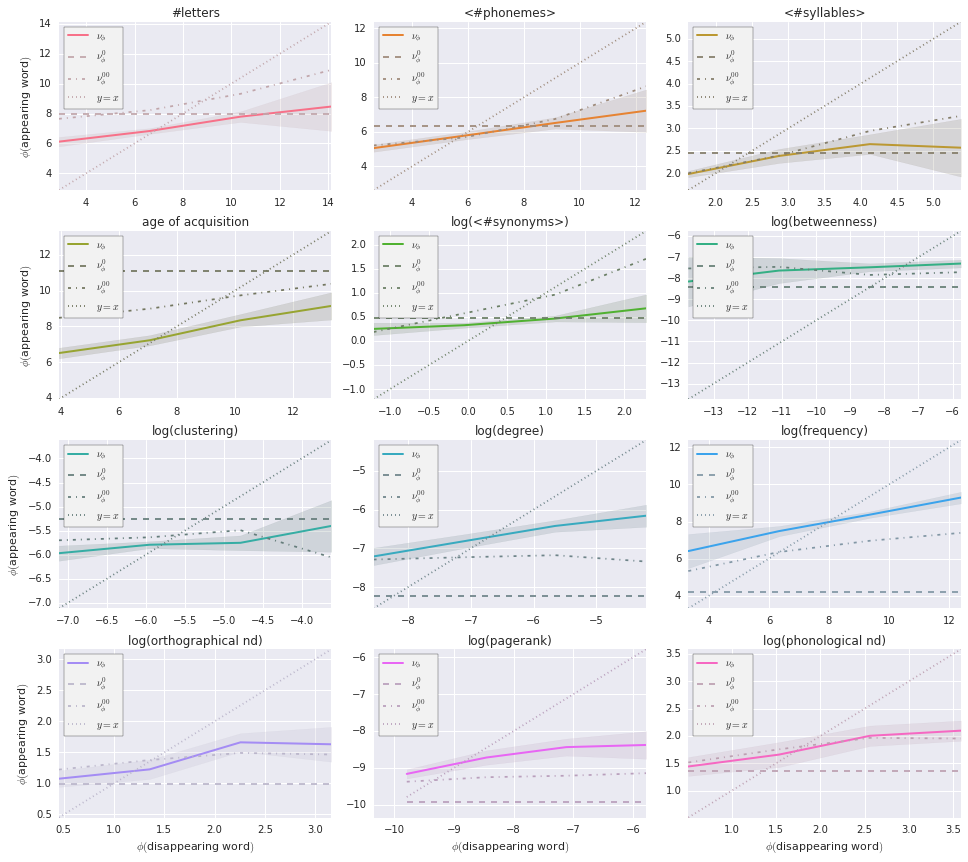

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

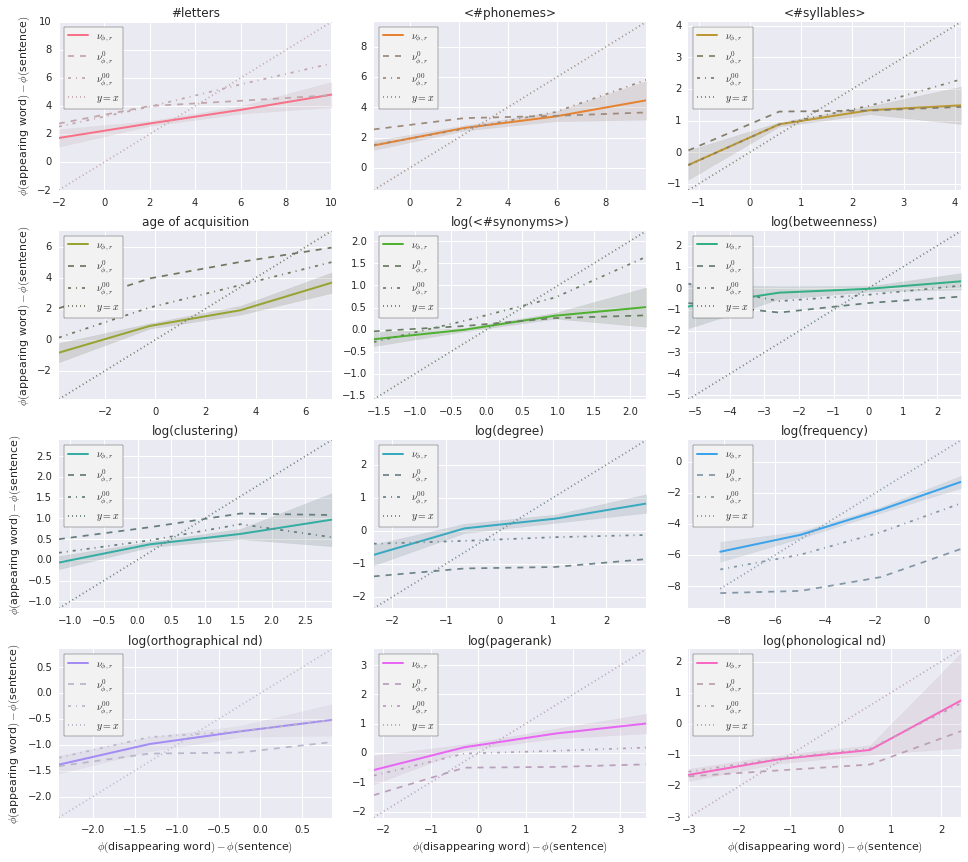

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

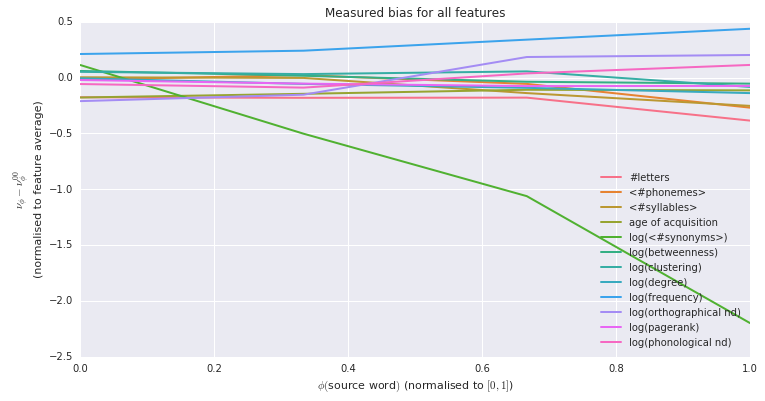

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

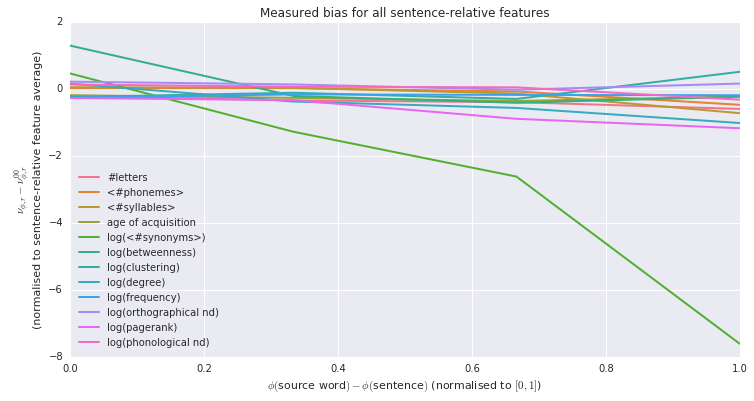

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

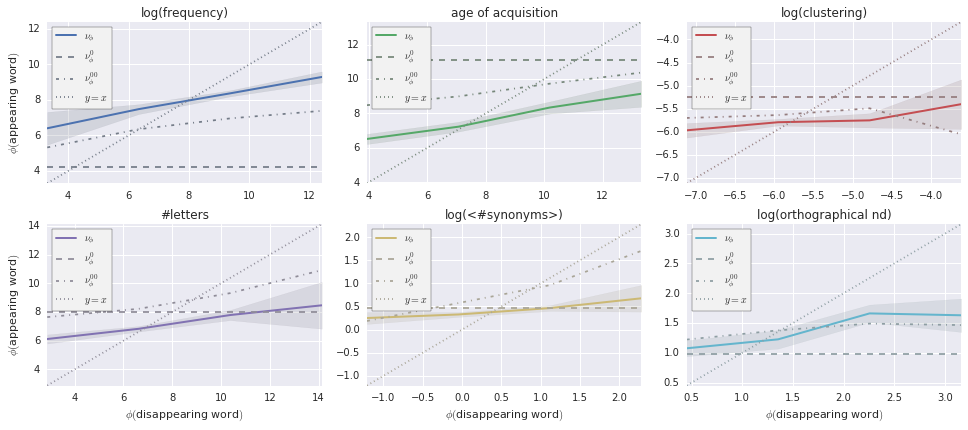

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

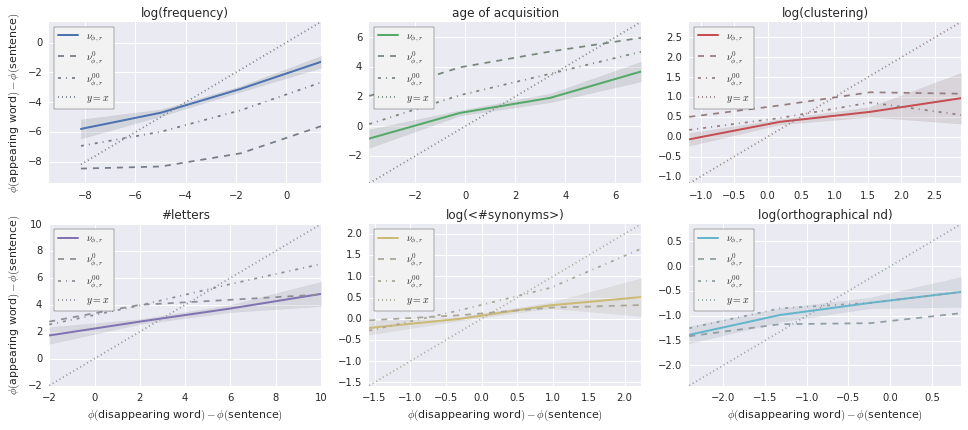

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

And the same with features relative to sentence average

Now $\nu_{\phi} - \nu_{\phi}^{00}$

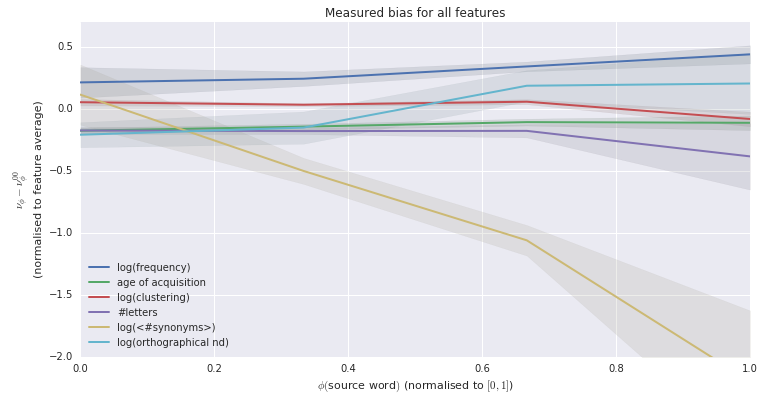

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

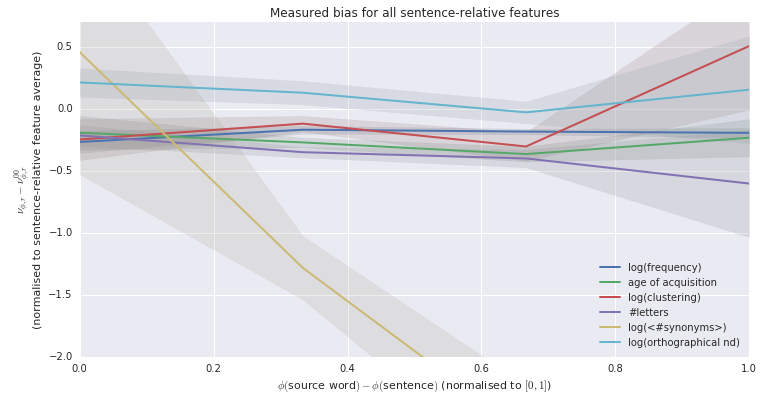

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


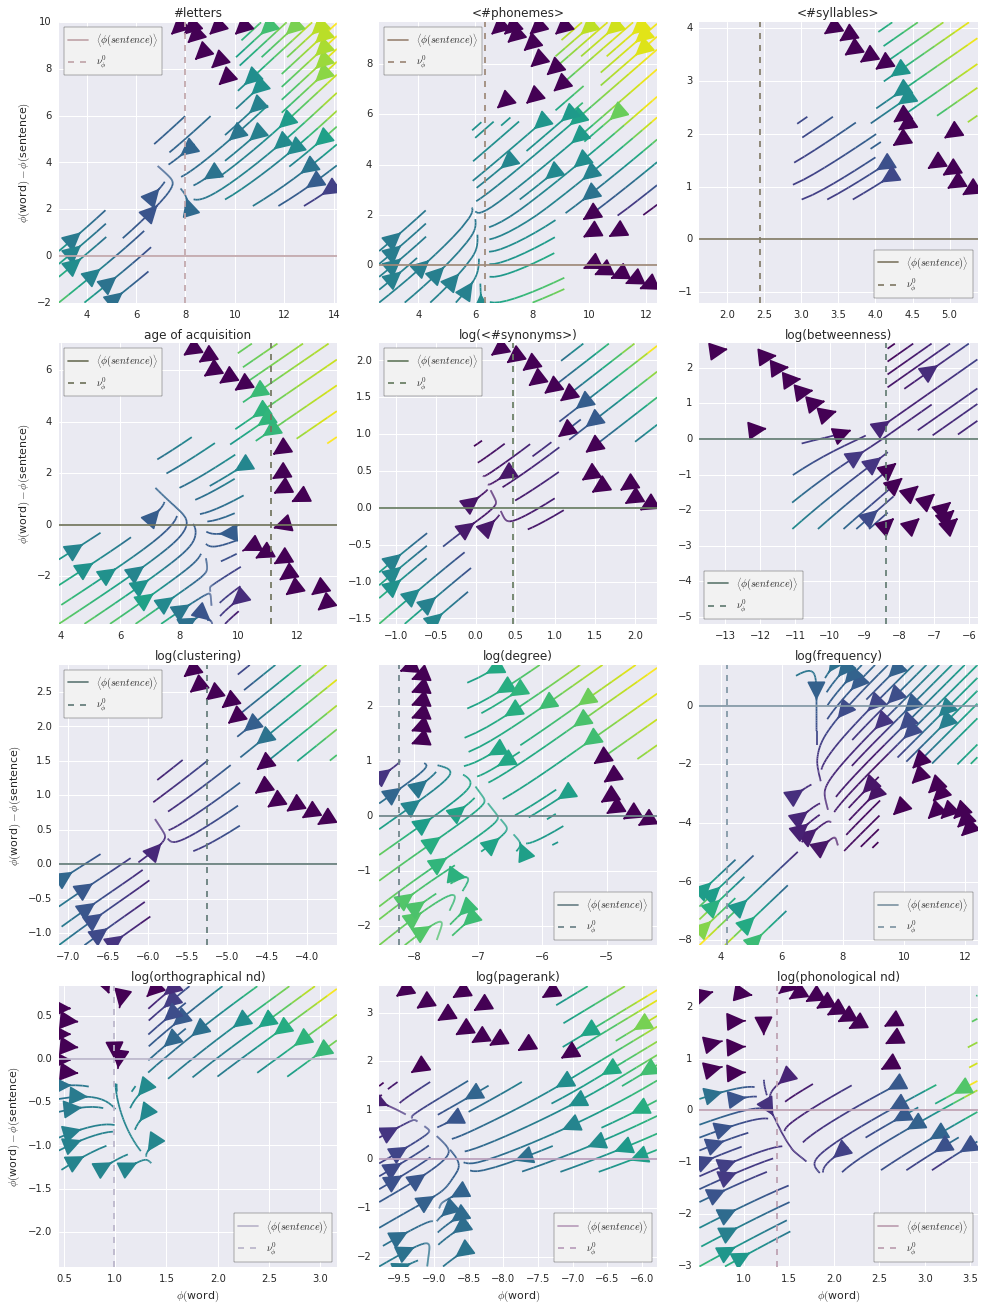

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


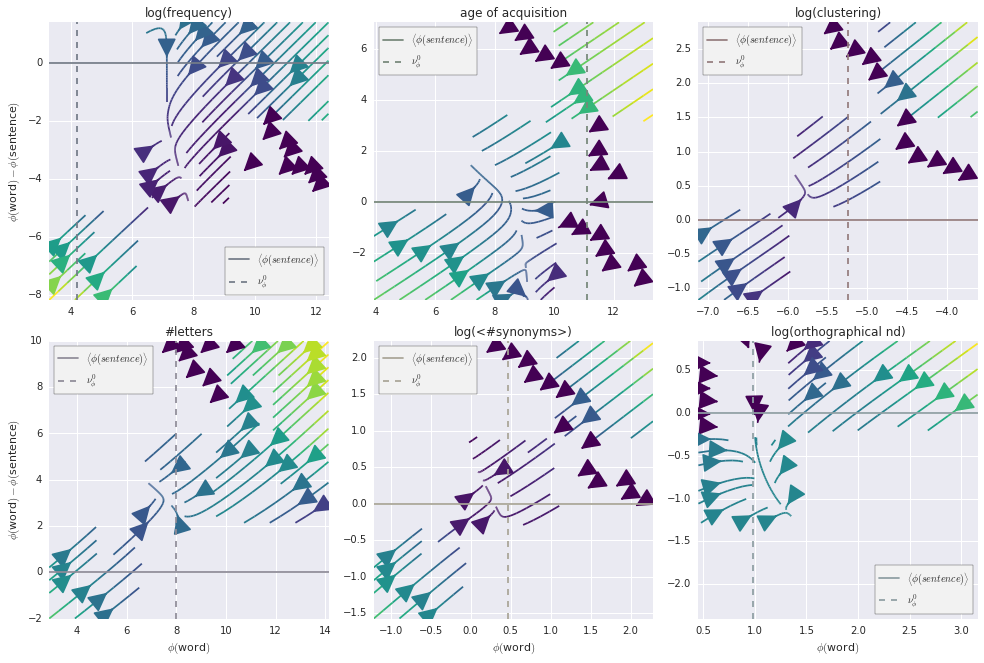

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.54397402  0.15760192  0.08664131  0.06671545  0.03601009  0.03161372
  0.02094641  0.01858533  0.01508258  0.00976933  0.00758064]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.452200,0.312340,-0.085075,0.258025,0.223818,-0.420049,0.218441,0.292891,-0.402342,0.273848,-0.164957,0.004942
Component-1,0.290753,-0.399838,0.138971,-0.279161,-0.283238,-0.417188,0.185618,-0.289115,-0.455832,0.226335,-0.164162,0.008766
Component-2,-0.629881,-0.053819,0.103383,-0.031695,-0.752053,0.128587,0.021146,-0.014262,0.043986,-0.049928,-0.012339,0.036218


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 19524) |          | Elapsed Time: 0:00:48 ETA:  10 days, 21:19:44

  0% (  101 of 19524) |                    | Elapsed Time: 0:00:49 ETA:  0:02:26

  1% (  221 of 19524) |                    | Elapsed Time: 0:00:50 ETA:  0:02:08

  1% (  245 of 19524) |                    | Elapsed Time: 0:00:50 ETA:  0:02:07

  1% (  342 of 19524) |                    | Elapsed Time: 0:00:51 ETA:  0:02:13

  2% (  408 of 19524) |                    | Elapsed Time: 0:00:52 ETA:  0:02:30

  2% (  489 of 19524) |                    | Elapsed Time: 0:00:53 ETA:  0:02:25

  3% (  635 of 19524) |                    | Elapsed Time: 0:00:54 ETA:  0:02:09

  3% (  733 of 19524) |                    | Elapsed Time: 0:00:55 ETA:  0:02:07

  4% (  843 of 19524) |                    | Elapsed Time: 0:00:56 ETA:  0:02:05

  5% (  977 of 19524) |#                   | Elapsed Time: 0:00:57 ETA:  0:02:03

  5% ( 1094 of 19524) |#                   | Elapsed Time: 0:00:58 ETA:  0:02:00

  6% ( 1221 of 19524) |#                   | Elapsed Time: 0:00:59 ETA:  0:01:45

  6% ( 1341 of 19524) |#                   | Elapsed Time: 0:01:00 ETA:  0:01:42

  7% ( 1465 of 19524) |#                   | Elapsed Time: 0:01:01 ETA:  0:01:45

  8% ( 1585 of 19524) |#                   | Elapsed Time: 0:01:02 ETA:  0:01:43

  8% ( 1709 of 19524) |#                   | Elapsed Time: 0:01:03 ETA:  0:01:40

  9% ( 1826 of 19524) |#                   | Elapsed Time: 0:01:04 ETA:  0:01:39

 10% ( 1953 of 19524) |##                  | Elapsed Time: 0:01:05 ETA:  0:01:38

 10% ( 2069 of 19524) |##                  | Elapsed Time: 0:01:06 ETA:  0:01:37

 11% ( 2171 of 19524) |##                  | Elapsed Time: 0:01:07 ETA:  0:01:40

 11% ( 2197 of 19524) |##                  | Elapsed Time: 0:01:07 ETA:  0:01:43

 11% ( 2302 of 19524) |##                  | Elapsed Time: 0:01:08 ETA:  0:01:46

 12% ( 2388 of 19524) |##                  | Elapsed Time: 0:01:09 ETA:  0:01:53

 12% ( 2441 of 19524) |##                  | Elapsed Time: 0:01:10 ETA:  0:01:56

 12% ( 2524 of 19524) |##                  | Elapsed Time: 0:01:11 ETA:  0:02:04

 13% ( 2606 of 19524) |##                  | Elapsed Time: 0:01:12 ETA:  0:02:14

 13% ( 2685 of 19524) |##                  | Elapsed Time: 0:01:13 ETA:  0:02:10

 14% ( 2796 of 19524) |##                  | Elapsed Time: 0:01:14 ETA:  0:02:10

 14% ( 2894 of 19524) |##                  | Elapsed Time: 0:01:15 ETA:  0:02:10

 15% ( 2929 of 19524) |###                 | Elapsed Time: 0:01:15 ETA:  0:02:09

 15% ( 3029 of 19524) |###                 | Elapsed Time: 0:01:16 ETA:  0:02:10

 16% ( 3128 of 19524) |###                 | Elapsed Time: 0:01:17 ETA:  0:02:05

 16% ( 3173 of 19524) |###                 | Elapsed Time: 0:01:17 ETA:  0:02:00

 16% ( 3301 of 19524) |###                 | Elapsed Time: 0:01:18 ETA:  0:01:47

 17% ( 3417 of 19524) |###                 | Elapsed Time: 0:01:19 ETA:  0:01:35

 18% ( 3554 of 19524) |###                 | Elapsed Time: 0:01:20 ETA:  0:01:30

 18% ( 3661 of 19524) |###                 | Elapsed Time: 0:01:21 ETA:  0:01:25

 19% ( 3802 of 19524) |###                 | Elapsed Time: 0:01:22 ETA:  0:01:16

 20% ( 3905 of 19524) |####                | Elapsed Time: 0:01:23 ETA:  0:01:12

 20% ( 4039 of 19524) |####                | Elapsed Time: 0:01:24 ETA:  0:01:06

 21% ( 4149 of 19524) |####                | Elapsed Time: 0:01:25 ETA:  0:01:00

 21% ( 4266 of 19524) |####                | Elapsed Time: 0:01:26 ETA:  0:01:01

 22% ( 4393 of 19524) |####                | Elapsed Time: 0:01:27 ETA:  0:01:01

 23% ( 4514 of 19524) |####                | Elapsed Time: 0:01:28 ETA:  0:01:02

 23% ( 4637 of 19524) |####                | Elapsed Time: 0:01:28 ETA:  0:01:02

 24% ( 4767 of 19524) |####                | Elapsed Time: 0:01:29 ETA:  0:01:02

 25% ( 4882 of 19524) |#####               | Elapsed Time: 0:01:31 ETA:  0:01:08

 25% ( 4968 of 19524) |#####               | Elapsed Time: 0:01:32 ETA:  0:01:16

 25% ( 5058 of 19524) |#####               | Elapsed Time: 0:01:33 ETA:  0:01:21

 26% ( 5126 of 19524) |#####               | Elapsed Time: 0:01:33 ETA:  0:01:22

 26% ( 5222 of 19524) |#####               | Elapsed Time: 0:01:34 ETA:  0:01:24

 27% ( 5321 of 19524) |#####               | Elapsed Time: 0:01:35 ETA:  0:01:28

 27% ( 5370 of 19524) |#####               | Elapsed Time: 0:01:36 ETA:  0:01:33

 28% ( 5490 of 19524) |#####               | Elapsed Time: 0:01:37 ETA:  0:01:35

 28% ( 5614 of 19524) |#####               | Elapsed Time: 0:01:38 ETA:  0:01:31

 29% ( 5714 of 19524) |#####               | Elapsed Time: 0:01:39 ETA:  0:01:27

 30% ( 5858 of 19524) |######              | Elapsed Time: 0:01:40 ETA:  0:01:19

 30% ( 5933 of 19524) |######              | Elapsed Time: 0:01:41 ETA:  0:01:23

 30% ( 6034 of 19524) |######              | Elapsed Time: 0:01:42 ETA:  0:01:22

 31% ( 6102 of 19524) |######              | Elapsed Time: 0:01:42 ETA:  0:01:19

 31% ( 6223 of 19524) |######              | Elapsed Time: 0:01:43 ETA:  0:01:18

 32% ( 6346 of 19524) |######              | Elapsed Time: 0:01:45 ETA:  0:01:17

 33% ( 6471 of 19524) |######              | Elapsed Time: 0:01:46 ETA:  0:01:10

 33% ( 6590 of 19524) |######              | Elapsed Time: 0:01:46 ETA:  0:01:08

 34% ( 6713 of 19524) |######              | Elapsed Time: 0:01:47 ETA:  0:01:05

 35% ( 6834 of 19524) |#######             | Elapsed Time: 0:01:49 ETA:  0:00:52

 35% ( 6945 of 19524) |#######             | Elapsed Time: 0:01:50 ETA:  0:00:54

 35% ( 7015 of 19524) |#######             | Elapsed Time: 0:01:51 ETA:  0:01:03

 36% ( 7078 of 19524) |#######             | Elapsed Time: 0:01:51 ETA:  0:01:03

 36% ( 7190 of 19524) |#######             | Elapsed Time: 0:01:52 ETA:  0:01:02

 37% ( 7279 of 19524) |#######             | Elapsed Time: 0:01:53 ETA:  0:01:09

 37% ( 7322 of 19524) |#######             | Elapsed Time: 0:01:54 ETA:  0:01:12

 38% ( 7469 of 19524) |#######             | Elapsed Time: 0:01:55 ETA:  0:01:05

 38% ( 7566 of 19524) |#######             | Elapsed Time: 0:01:55 ETA:  0:01:01

 39% ( 7688 of 19524) |#######             | Elapsed Time: 0:01:56 ETA:  0:00:58

 40% ( 7810 of 19524) |########            | Elapsed Time: 0:01:57 ETA:  0:00:45

 40% ( 7931 of 19524) |########            | Elapsed Time: 0:01:58 ETA:  0:00:43

 41% ( 8054 of 19524) |########            | Elapsed Time: 0:01:59 ETA:  0:00:40

 41% ( 8171 of 19524) |########            | Elapsed Time: 0:02:00 ETA:  0:00:34

 42% ( 8298 of 19524) |########            | Elapsed Time: 0:02:01 ETA:  0:00:38

 43% ( 8433 of 19524) |########            | Elapsed Time: 0:02:02 ETA:  0:00:37

 43% ( 8542 of 19524) |########            | Elapsed Time: 0:02:03 ETA:  0:00:31

 44% ( 8687 of 19524) |########            | Elapsed Time: 0:02:04 ETA:  0:00:25

 45% ( 8786 of 19524) |#########           | Elapsed Time: 0:02:05 ETA:  0:00:22

 45% ( 8905 of 19524) |#########           | Elapsed Time: 0:02:06 ETA:  0:00:21

 46% ( 9030 of 19524) |#########           | Elapsed Time: 0:02:07 ETA:  0:00:20

 47% ( 9177 of 19524) |#########           | Elapsed Time: 0:02:08 ETA:  0:00:14

 47% ( 9274 of 19524) |#########           | Elapsed Time: 0:02:08 ETA:  0:00:09

 48% ( 9420 of 19524) |#########           | Elapsed Time: 0:02:09 ETA:  0:00:07

 48% ( 9518 of 19524) |#########           | Elapsed Time: 0:02:10 ETA:  0:00:06

 49% ( 9653 of 19524) |#########           | Elapsed Time: 0:02:11 ETA:  0:00:07

 50% ( 9763 of 19524) |##########          | Elapsed Time: 0:02:12 ETA:  0:00:08

 50% ( 9890 of 19524) |##########          | Elapsed Time: 0:02:13 ETA:  0:00:10

 51% (10007 of 19524) |##########          | Elapsed Time: 0:02:14 ETA:  0:00:09

 51% (10138 of 19524) |##########          | Elapsed Time: 0:02:15 ETA:  0:00:11

 52% (10251 of 19524) |##########          | Elapsed Time: 0:02:16 ETA:  0:00:11

 53% (10395 of 19524) |##########          | Elapsed Time: 0:02:17 ETA:  0:00:10

 53% (10495 of 19524) |##########          | Elapsed Time: 0:02:17 ETA:  0:00:08

 54% (10645 of 19524) |##########          | Elapsed Time: 0:02:18 ETA:  0:00:05

 55% (10739 of 19524) |###########         | Elapsed Time: 0:02:19 ETA:  0:00:04

 55% (10867 of 19524) |###########         | Elapsed Time: 0:02:20 ETA:  0:00:03

 56% (10983 of 19524) |###########         | Elapsed Time: 0:02:21 ETA:  0:00:01

 56% (11126 of 19524) |###########         | Elapsed Time: 0:02:22 ETA:  0:00:00

 57% (11227 of 19524) |###########         | Elapsed Time: 0:02:23 ETA:  0:00:00

 58% (11357 of 19524) |###########         | Elapsed Time: 0:02:24 ETA:  0:00:00

 58% (11471 of 19524) |###########         | Elapsed Time: 0:02:25 ETA:  0:00:00

 59% (11614 of 19524) |###########         | Elapsed Time: 0:02:26 ETA:  0:00:00

 60% (11715 of 19524) |############        | Elapsed Time: 0:02:26 ETA:  0:00:00

 60% (11849 of 19524) |############        | Elapsed Time: 0:02:27 ETA:  0:00:00

 61% (11959 of 19524) |############        | Elapsed Time: 0:02:28 ETA:  0:00:00

 61% (12093 of 19524) |############        | Elapsed Time: 0:02:29 ETA:  0:00:00

 62% (12203 of 19524) |############        | Elapsed Time: 0:02:30 ETA:  0:00:00

 63% (12340 of 19524) |############        | Elapsed Time: 0:02:31 ETA:  0:00:00

 63% (12447 of 19524) |############        | Elapsed Time: 0:02:32 ETA:  0:00:00

 64% (12573 of 19524) |############        | Elapsed Time: 0:02:33 ETA:  0:00:00

 65% (12691 of 19524) |#############       | Elapsed Time: 0:02:33 ETA:  0:00:00

 65% (12848 of 19524) |#############       | Elapsed Time: 0:02:34 ETA:  0:00:00

 66% (12935 of 19524) |#############       | Elapsed Time: 0:02:35 ETA:  0:00:00

 66% (13064 of 19524) |#############       | Elapsed Time: 0:02:36 ETA:  0:00:00

 67% (13179 of 19524) |#############       | Elapsed Time: 0:02:37 ETA:  0:00:00

 68% (13309 of 19524) |#############       | Elapsed Time: 0:02:38 ETA:  0:00:00

 68% (13423 of 19524) |#############       | Elapsed Time: 0:02:39 ETA:  0:00:00

 69% (13564 of 19524) |#############       | Elapsed Time: 0:02:40 ETA:  0:00:00

 70% (13667 of 19524) |##############      | Elapsed Time: 0:02:41 ETA:  0:00:00

 70% (13772 of 19524) |##############      | Elapsed Time: 0:02:42 ETA:  0:00:00

 71% (13911 of 19524) |##############      | Elapsed Time: 0:02:43 ETA:  0:00:00

 71% (14022 of 19524) |##############      | Elapsed Time: 0:02:44 ETA:  0:00:00

 72% (14155 of 19524) |##############      | Elapsed Time: 0:02:45 ETA:  0:00:00

 73% (14290 of 19524) |##############      | Elapsed Time: 0:02:46 ETA:  0:00:00

 73% (14399 of 19524) |##############      | Elapsed Time: 0:02:47 ETA:  0:00:00

 74% (14534 of 19524) |##############      | Elapsed Time: 0:02:48 ETA:  0:00:00

 75% (14644 of 19524) |###############     | Elapsed Time: 0:02:48 ETA:  0:00:00

 75% (14773 of 19524) |###############     | Elapsed Time: 0:02:49 ETA:  0:00:00

 76% (14888 of 19524) |###############     | Elapsed Time: 0:02:50 ETA:  0:00:00

 76% (15028 of 19524) |###############     | Elapsed Time: 0:02:51 ETA:  0:00:00

 77% (15132 of 19524) |###############     | Elapsed Time: 0:02:52 ETA:  0:00:00

 78% (15264 of 19524) |###############     | Elapsed Time: 0:02:53 ETA:  0:00:00

 78% (15376 of 19524) |###############     | Elapsed Time: 0:02:54 ETA:  0:00:00

 79% (15515 of 19524) |###############     | Elapsed Time: 0:02:55 ETA:  0:00:00

 80% (15620 of 19524) |################    | Elapsed Time: 0:02:56 ETA:  0:00:00

 80% (15750 of 19524) |################    | Elapsed Time: 0:02:57 ETA:  0:00:00

 81% (15864 of 19524) |################    | Elapsed Time: 0:02:58 ETA:  0:00:00

 81% (15988 of 19524) |################    | Elapsed Time: 0:02:59 ETA:  0:00:00

 82% (16108 of 19524) |################    | Elapsed Time: 0:02:59 ETA:  0:00:00

 83% (16244 of 19524) |################    | Elapsed Time: 0:03:00 ETA:  0:00:00

 83% (16352 of 19524) |################    | Elapsed Time: 0:03:01 ETA:  0:00:00

 84% (16481 of 19524) |################    | Elapsed Time: 0:03:02 ETA:  0:00:00

 85% (16596 of 19524) |#################   | Elapsed Time: 0:03:03 ETA:  0:00:00

 85% (16741 of 19524) |#################   | Elapsed Time: 0:03:04 ETA:  0:00:00

 86% (16840 of 19524) |#################   | Elapsed Time: 0:03:05 ETA:  0:00:00

 86% (16984 of 19524) |#################   | Elapsed Time: 0:03:06 ETA:  0:00:00

 87% (17084 of 19524) |#################   | Elapsed Time: 0:03:06 ETA:  0:00:00

 88% (17206 of 19524) |#################   | Elapsed Time: 0:03:07 ETA:  0:00:00

 88% (17328 of 19524) |#################   | Elapsed Time: 0:03:08 ETA:  0:00:00

 89% (17472 of 19524) |#################   | Elapsed Time: 0:03:09 ETA:  0:00:00

 90% (17572 of 19524) |##################  | Elapsed Time: 0:03:10 ETA:  0:00:00

 90% (17719 of 19524) |##################  | Elapsed Time: 0:03:11 ETA:  0:00:00

 91% (17816 of 19524) |##################  | Elapsed Time: 0:03:12 ETA:  0:00:00

 91% (17951 of 19524) |##################  | Elapsed Time: 0:03:13 ETA:  0:00:00

 92% (18060 of 19524) |##################  | Elapsed Time: 0:03:14 ETA:  0:00:00

 93% (18203 of 19524) |##################  | Elapsed Time: 0:03:15 ETA:  0:00:00

 93% (18304 of 19524) |##################  | Elapsed Time: 0:03:15 ETA:  0:00:00

 94% (18438 of 19524) |##################  | Elapsed Time: 0:03:16 ETA:  0:00:00

 95% (18548 of 19524) |################### | Elapsed Time: 0:03:17 ETA:  0:00:00

 95% (18680 of 19524) |################### | Elapsed Time: 0:03:18 ETA:  0:00:00

 96% (18792 of 19524) |################### | Elapsed Time: 0:03:19 ETA:  0:00:00

 96% (18935 of 19524) |################### | Elapsed Time: 0:03:20 ETA:  0:00:00

 97% (19036 of 19524) |################### | Elapsed Time: 0:03:21 ETA:  0:00:00

 98% (19153 of 19524) |################### | Elapsed Time: 0:03:22 ETA:  0:00:00

 98% (19280 of 19524) |################### | Elapsed Time: 0:03:23 ETA:  0:00:00

 99% (19411 of 19524) |################### | Elapsed Time: 0:03:24 ETA:  0:00:00

100% (19524 of 19524) |####################| Elapsed Time: 0:03:25 Time: 0:03:25


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

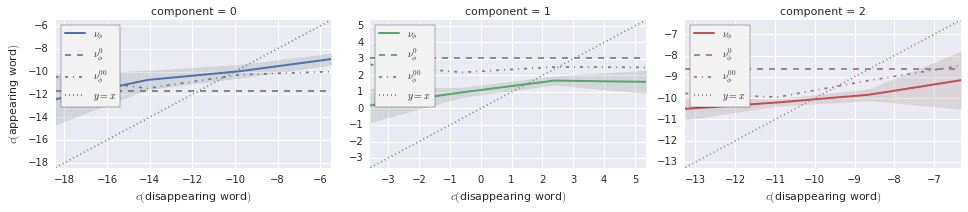

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.55642922  0.17305122  0.1577154 ]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,-0.696512,-0.106415,0.330078,-0.557471,0.289263,0.012171
Component-1,0.425424,0.114795,-0.490388,-0.691345,0.294767,-0.022595
Component-2,-0.567984,0.099281,-0.786870,0.215657,-0.019227,0.038667


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 19524) |           | Elapsed Time: 0:00:11 ETA:  2 days, 16:17:36

  0% (  136 of 19524) |                    | Elapsed Time: 0:00:12 ETA:  0:02:12

  1% (  245 of 19524) |                    | Elapsed Time: 0:00:13 ETA:  0:02:01

  1% (  362 of 19524) |                    | Elapsed Time: 0:00:14 ETA:  0:02:11

  2% (  489 of 19524) |                    | Elapsed Time: 0:00:15 ETA:  0:02:10

  3% (  661 of 19524) |                    | Elapsed Time: 0:00:16 ETA:  0:02:01

  3% (  733 of 19524) |                    | Elapsed Time: 0:00:17 ETA:  0:02:00

  4% (  881 of 19524) |                    | Elapsed Time: 0:00:18 ETA:  0:01:58

  5% (  977 of 19524) |#                   | Elapsed Time: 0:00:18 ETA:  0:01:57

  5% ( 1132 of 19524) |#                   | Elapsed Time: 0:00:19 ETA:  0:01:54

  6% ( 1221 of 19524) |#                   | Elapsed Time: 0:00:20 ETA:  0:01:52

  7% ( 1368 of 19524) |#                   | Elapsed Time: 0:00:21 ETA:  0:01:52

  7% ( 1465 of 19524) |#                   | Elapsed Time: 0:00:21 ETA:  0:01:47

  8% ( 1620 of 19524) |#                   | Elapsed Time: 0:00:22 ETA:  0:01:43

  8% ( 1709 of 19524) |#                   | Elapsed Time: 0:00:23 ETA:  0:01:45

  9% ( 1860 of 19524) |#                   | Elapsed Time: 0:00:24 ETA:  0:01:44

 10% ( 1953 of 19524) |##                  | Elapsed Time: 0:00:25 ETA:  0:01:42

 10% ( 2103 of 19524) |##                  | Elapsed Time: 0:00:26 ETA:  0:01:42

 11% ( 2197 of 19524) |##                  | Elapsed Time: 0:00:26 ETA:  0:01:42

 11% ( 2335 of 19524) |##                  | Elapsed Time: 0:00:27 ETA:  0:01:43

 12% ( 2441 of 19524) |##                  | Elapsed Time: 0:00:28 ETA:  0:01:46

 13% ( 2550 of 19524) |##                  | Elapsed Time: 0:00:29 ETA:  0:01:51

 13% ( 2685 of 19524) |##                  | Elapsed Time: 0:00:30 ETA:  0:01:54

 14% ( 2837 of 19524) |##                  | Elapsed Time: 0:00:31 ETA:  0:01:53

 15% ( 2929 of 19524) |###                 | Elapsed Time: 0:00:32 ETA:  0:01:54

 15% ( 3064 of 19524) |###                 | Elapsed Time: 0:00:33 ETA:  0:01:55

 16% ( 3173 of 19524) |###                 | Elapsed Time: 0:00:34 ETA:  0:01:53

 17% ( 3343 of 19524) |###                 | Elapsed Time: 0:00:35 ETA:  0:01:47

 17% ( 3417 of 19524) |###                 | Elapsed Time: 0:00:35 ETA:  0:01:41

 18% ( 3590 of 19524) |###                 | Elapsed Time: 0:00:36 ETA:  0:01:31

 18% ( 3661 of 19524) |###                 | Elapsed Time: 0:00:36 ETA:  0:01:27

 19% ( 3831 of 19524) |###                 | Elapsed Time: 0:00:37 ETA:  0:01:25

 20% ( 3905 of 19524) |####                | Elapsed Time: 0:00:38 ETA:  0:01:23

 20% ( 4078 of 19524) |####                | Elapsed Time: 0:00:39 ETA:  0:01:19

 21% ( 4149 of 19524) |####                | Elapsed Time: 0:00:39 ETA:  0:01:15

 22% ( 4310 of 19524) |####                | Elapsed Time: 0:00:40 ETA:  0:01:14

 22% ( 4393 of 19524) |####                | Elapsed Time: 0:00:41 ETA:  0:01:13

 23% ( 4558 of 19524) |####                | Elapsed Time: 0:00:42 ETA:  0:01:13

 23% ( 4637 of 19524) |####                | Elapsed Time: 0:00:42 ETA:  0:01:12

 24% ( 4809 of 19524) |####                | Elapsed Time: 0:00:43 ETA:  0:01:11

 25% ( 4882 of 19524) |#####               | Elapsed Time: 0:00:44 ETA:  0:01:12

 25% ( 4999 of 19524) |#####               | Elapsed Time: 0:00:45 ETA:  0:01:17

 26% ( 5126 of 19524) |#####               | Elapsed Time: 0:00:46 ETA:  0:01:19

 26% ( 5258 of 19524) |#####               | Elapsed Time: 0:00:47 ETA:  0:01:22

 27% ( 5370 of 19524) |#####               | Elapsed Time: 0:00:47 ETA:  0:01:23

 28% ( 5530 of 19524) |#####               | Elapsed Time: 0:00:48 ETA:  0:01:22

 28% ( 5614 of 19524) |#####               | Elapsed Time: 0:00:49 ETA:  0:01:24

 29% ( 5751 of 19524) |#####               | Elapsed Time: 0:00:50 ETA:  0:01:26

 30% ( 5858 of 19524) |######              | Elapsed Time: 0:00:51 ETA:  0:01:27

 30% ( 5972 of 19524) |######              | Elapsed Time: 0:00:52 ETA:  0:01:29

 31% ( 6102 of 19524) |######              | Elapsed Time: 0:00:53 ETA:  0:01:25

 32% ( 6260 of 19524) |######              | Elapsed Time: 0:00:54 ETA:  0:01:22

 32% ( 6346 of 19524) |######              | Elapsed Time: 0:00:54 ETA:  0:01:19

 33% ( 6512 of 19524) |######              | Elapsed Time: 0:00:55 ETA:  0:01:16

 33% ( 6590 of 19524) |######              | Elapsed Time: 0:00:56 ETA:  0:01:16

 34% ( 6748 of 19524) |######              | Elapsed Time: 0:00:57 ETA:  0:01:13

 35% ( 6834 of 19524) |#######             | Elapsed Time: 0:00:57 ETA:  0:01:11

 35% ( 6962 of 19524) |#######             | Elapsed Time: 0:00:58 ETA:  0:01:14

 36% ( 7078 of 19524) |#######             | Elapsed Time: 0:00:59 ETA:  0:01:10

 36% ( 7220 of 19524) |#######             | Elapsed Time: 0:01:00 ETA:  0:01:10

 37% ( 7322 of 19524) |#######             | Elapsed Time: 0:01:01 ETA:  0:01:12

 38% ( 7491 of 19524) |#######             | Elapsed Time: 0:01:02 ETA:  0:01:09

 38% ( 7566 of 19524) |#######             | Elapsed Time: 0:01:02 ETA:  0:01:10

 39% ( 7705 of 19524) |#######             | Elapsed Time: 0:01:03 ETA:  0:01:11

 40% ( 7810 of 19524) |########            | Elapsed Time: 0:01:04 ETA:  0:01:12

 40% ( 7946 of 19524) |########            | Elapsed Time: 0:01:05 ETA:  0:01:13

 41% ( 8054 of 19524) |########            | Elapsed Time: 0:01:06 ETA:  0:01:10

 41% ( 8184 of 19524) |########            | Elapsed Time: 0:01:07 ETA:  0:01:10

 42% ( 8298 of 19524) |########            | Elapsed Time: 0:01:08 ETA:  0:01:10

 43% ( 8448 of 19524) |########            | Elapsed Time: 0:01:09 ETA:  0:01:07

 43% ( 8542 of 19524) |########            | Elapsed Time: 0:01:09 ETA:  0:01:07

 44% ( 8704 of 19524) |########            | Elapsed Time: 0:01:10 ETA:  0:01:05

 45% ( 8786 of 19524) |#########           | Elapsed Time: 0:01:11 ETA:  0:01:02

 45% ( 8920 of 19524) |#########           | Elapsed Time: 0:01:12 ETA:  0:01:02

 46% ( 9030 of 19524) |#########           | Elapsed Time: 0:01:13 ETA:  0:01:00

 47% ( 9191 of 19524) |#########           | Elapsed Time: 0:01:14 ETA:  0:00:57

 47% ( 9274 of 19524) |#########           | Elapsed Time: 0:01:14 ETA:  0:00:53

 48% ( 9434 of 19524) |#########           | Elapsed Time: 0:01:15 ETA:  0:00:49

 48% ( 9518 of 19524) |#########           | Elapsed Time: 0:01:16 ETA:  0:00:48

 49% ( 9669 of 19524) |#########           | Elapsed Time: 0:01:17 ETA:  0:00:49

 50% ( 9763 of 19524) |##########          | Elapsed Time: 0:01:17 ETA:  0:00:50

 50% ( 9893 of 19524) |##########          | Elapsed Time: 0:01:18 ETA:  0:00:52

 51% (10007 of 19524) |##########          | Elapsed Time: 0:01:19 ETA:  0:00:52

 51% (10147 of 19524) |##########          | Elapsed Time: 0:01:20 ETA:  0:00:52

 52% (10251 of 19524) |##########          | Elapsed Time: 0:01:21 ETA:  0:00:52

 53% (10415 of 19524) |##########          | Elapsed Time: 0:01:22 ETA:  0:00:51

 53% (10495 of 19524) |##########          | Elapsed Time: 0:01:22 ETA:  0:00:51

 54% (10655 of 19524) |##########          | Elapsed Time: 0:01:23 ETA:  0:00:49

 55% (10739 of 19524) |###########         | Elapsed Time: 0:01:24 ETA:  0:00:49

 55% (10877 of 19524) |###########         | Elapsed Time: 0:01:25 ETA:  0:00:49

 56% (10983 of 19524) |###########         | Elapsed Time: 0:01:26 ETA:  0:00:48

 57% (11138 of 19524) |###########         | Elapsed Time: 0:01:27 ETA:  0:00:43

 57% (11227 of 19524) |###########         | Elapsed Time: 0:01:27 ETA:  0:00:42

 58% (11362 of 19524) |###########         | Elapsed Time: 0:01:28 ETA:  0:00:43

 58% (11471 of 19524) |###########         | Elapsed Time: 0:01:29 ETA:  0:00:44

 59% (11620 of 19524) |###########         | Elapsed Time: 0:01:30 ETA:  0:00:43

 60% (11715 of 19524) |############        | Elapsed Time: 0:01:31 ETA:  0:00:44

 60% (11863 of 19524) |############        | Elapsed Time: 0:01:32 ETA:  0:00:43

 61% (11959 of 19524) |############        | Elapsed Time: 0:01:32 ETA:  0:00:40

 62% (12115 of 19524) |############        | Elapsed Time: 0:01:33 ETA:  0:00:36

 62% (12203 of 19524) |############        | Elapsed Time: 0:01:34 ETA:  0:00:36

 63% (12354 of 19524) |############        | Elapsed Time: 0:01:35 ETA:  0:00:35

 63% (12447 of 19524) |############        | Elapsed Time: 0:01:35 ETA:  0:00:32

 64% (12591 of 19524) |############        | Elapsed Time: 0:01:36 ETA:  0:00:32

 65% (12691 of 19524) |#############       | Elapsed Time: 0:01:37 ETA:  0:00:31

 65% (12858 of 19524) |#############       | Elapsed Time: 0:01:38 ETA:  0:00:29

 66% (12935 of 19524) |#############       | Elapsed Time: 0:01:39 ETA:  0:00:27

 66% (13079 of 19524) |#############       | Elapsed Time: 0:01:40 ETA:  0:00:28

 67% (13179 of 19524) |#############       | Elapsed Time: 0:01:40 ETA:  0:00:29

 68% (13321 of 19524) |#############       | Elapsed Time: 0:01:41 ETA:  0:00:29

 68% (13423 of 19524) |#############       | Elapsed Time: 0:01:42 ETA:  0:00:29

 69% (13581 of 19524) |#############       | Elapsed Time: 0:01:43 ETA:  0:00:27

 70% (13667 of 19524) |##############      | Elapsed Time: 0:01:44 ETA:  0:00:25

 70% (13781 of 19524) |##############      | Elapsed Time: 0:01:45 ETA:  0:00:27

 71% (13911 of 19524) |##############      | Elapsed Time: 0:01:45 ETA:  0:00:29

 71% (14037 of 19524) |##############      | Elapsed Time: 0:01:46 ETA:  0:00:31

 72% (14155 of 19524) |##############      | Elapsed Time: 0:01:47 ETA:  0:00:29

 73% (14307 of 19524) |##############      | Elapsed Time: 0:01:48 ETA:  0:00:27

 73% (14399 of 19524) |##############      | Elapsed Time: 0:01:49 ETA:  0:00:24

 74% (14554 of 19524) |##############      | Elapsed Time: 0:01:50 ETA:  0:00:22

 75% (14644 of 19524) |###############     | Elapsed Time: 0:01:50 ETA:  0:00:23

 75% (14791 of 19524) |###############     | Elapsed Time: 0:01:51 ETA:  0:00:23

 76% (14888 of 19524) |###############     | Elapsed Time: 0:01:52 ETA:  0:00:17

 77% (15038 of 19524) |###############     | Elapsed Time: 0:01:53 ETA:  0:00:15

 77% (15132 of 19524) |###############     | Elapsed Time: 0:01:54 ETA:  0:00:12

 78% (15280 of 19524) |###############     | Elapsed Time: 0:01:55 ETA:  0:00:12

 78% (15376 of 19524) |###############     | Elapsed Time: 0:01:55 ETA:  0:00:11

 79% (15525 of 19524) |###############     | Elapsed Time: 0:01:56 ETA:  0:00:12

 80% (15620 of 19524) |################    | Elapsed Time: 0:01:57 ETA:  0:00:13

 80% (15768 of 19524) |################    | Elapsed Time: 0:01:58 ETA:  0:00:13

 81% (15864 of 19524) |################    | Elapsed Time: 0:01:59 ETA:  0:00:12

 81% (16007 of 19524) |################    | Elapsed Time: 0:02:00 ETA:  0:00:13

 82% (16108 of 19524) |################    | Elapsed Time: 0:02:00 ETA:  0:00:11

 83% (16257 of 19524) |################    | Elapsed Time: 0:02:01 ETA:  0:00:10

 83% (16352 of 19524) |################    | Elapsed Time: 0:02:02 ETA:  0:00:09

 84% (16493 of 19524) |################    | Elapsed Time: 0:02:03 ETA:  0:00:10

 85% (16596 of 19524) |#################   | Elapsed Time: 0:02:03 ETA:  0:00:08

 85% (16745 of 19524) |#################   | Elapsed Time: 0:02:04 ETA:  0:00:05

 86% (16840 of 19524) |#################   | Elapsed Time: 0:02:05 ETA:  0:00:05

 87% (16996 of 19524) |#################   | Elapsed Time: 0:02:06 ETA:  0:00:03

 87% (17084 of 19524) |#################   | Elapsed Time: 0:02:07 ETA:  0:00:01

 88% (17223 of 19524) |#################   | Elapsed Time: 0:02:08 ETA:  0:00:02

 88% (17328 of 19524) |#################   | Elapsed Time: 0:02:08 ETA:  0:00:00

 89% (17485 of 19524) |#################   | Elapsed Time: 0:02:09 ETA:  0:00:00

 90% (17572 of 19524) |##################  | Elapsed Time: 0:02:10 ETA:  0:00:00

 90% (17729 of 19524) |##################  | Elapsed Time: 0:02:11 ETA:  0:00:00

 91% (17816 of 19524) |##################  | Elapsed Time: 0:02:11 ETA:  0:00:00

 92% (17965 of 19524) |##################  | Elapsed Time: 0:02:12 ETA:  0:00:00

 92% (18060 of 19524) |##################  | Elapsed Time: 0:02:13 ETA:  0:00:00

 93% (18216 of 19524) |##################  | Elapsed Time: 0:02:14 ETA:  0:00:00

 93% (18304 of 19524) |##################  | Elapsed Time: 0:02:15 ETA:  0:00:00

 94% (18450 of 19524) |##################  | Elapsed Time: 0:02:16 ETA:  0:00:00

 95% (18548 of 19524) |################### | Elapsed Time: 0:02:17 ETA:  0:00:00

 95% (18697 of 19524) |################### | Elapsed Time: 0:02:18 ETA:  0:00:00

 96% (18792 of 19524) |################### | Elapsed Time: 0:02:18 ETA:  0:00:00

 97% (18942 of 19524) |################### | Elapsed Time: 0:02:19 ETA:  0:00:00

 97% (19036 of 19524) |################### | Elapsed Time: 0:02:20 ETA:  0:00:00

 98% (19166 of 19524) |################### | Elapsed Time: 0:02:21 ETA:  0:00:00

 98% (19280 of 19524) |################### | Elapsed Time: 0:02:21 ETA:  0:00:00

 99% (19427 of 19524) |################### | Elapsed Time: 0:02:22 ETA:  0:00:00

100% (19524 of 19524) |####################| Elapsed Time: 0:02:23 Time: 0:02:23


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

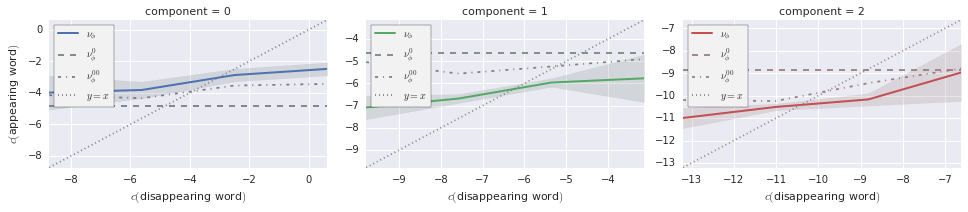

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1439 (cluster-unique) substitutions, but the PCA is in fact computed on 487 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.